In [66]:
import pandas as pd
import numpy as np

# Definir la magnitud del sismo y la profundidad del epicentro
magnitud_momento = 7.6
profundidad_sismo = 33

def calcular_radio_impacto(magnitud_momento, profundidad):
    # Calcular el factor de ajuste basado en la profundidad
    factor_profundidad = 10 / (profundidad + 10)
    
    # Calcular el factor de ajuste basado en la magnitud del sismo
    factor_magnitud = 10 ** (0.5 * magnitud_momento - 0.6)
    
    # Ajuste adicional para magnitudes extremas
    if magnitud_momento < 5:
        factor_magnitud *= 1.2  
    elif magnitud_momento > 8:
        factor_magnitud *= 0.6
    
    # Calcular el radio de impacto en kilómetros
    r_km = factor_magnitud * factor_profundidad
    
    return r_km

R_km = calcular_radio_impacto(magnitud_momento, profundidad_sismo)

print(R_km)


368.5798122002587


In [67]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definir la variable difusa para la magnitud del sismo
magnitud = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'magnitud')
magnitud['bajo'] = fuzz.gaussmf(magnitud.universe, 3.5, 1)
magnitud['moderado'] = fuzz.gaussmf(magnitud.universe, 5.5, 1)
magnitud['alto'] = fuzz.gaussmf(magnitud.universe, 7.5, 1)

# Definir la variable difusa para la profundidad del epicentro en km
profundidad = ctrl.Antecedent(np.arange(0, 701, 1), 'profundidad')
profundidad['superficial'] = fuzz.trapmf(profundidad.universe, [0, 20, 35, 50])
profundidad['intermedio'] = fuzz.trapmf(profundidad.universe, [40, 70, 100, 140])
profundidad['profundo'] = fuzz.trapmf(profundidad.universe, [120, 170, 250, 700])

# Definir la variable difusa para la distancia al epicentro
# (Suponiendo que 'R_km' es el radio previamente calculado y dividido en tres partes)
distancia = ctrl.Antecedent(np.arange(0, R_km + 1, 1), 'distancia')
distancia['cerca'] = fuzz.trimf(distancia.universe, [0, R_km/5, R_km/3])
distancia['medio'] = fuzz.trimf(distancia.universe, [R_km/4, R_km/2, 2*R_km/3])
distancia['lejano'] = fuzz.trimf(distancia.universe, [2*R_km/4, R_km, R_km])

# Definir la variable difusa para la población del distrito
poblacion = ctrl.Antecedent(np.arange(0, 1150471, 1000), 'poblacion')
poblacion['muy baja'] = fuzz.trapmf(poblacion.universe, [0, 0, 6734, 20000])
poblacion['baja'] = fuzz.trapmf(poblacion.universe, [10000, 30000, 79239, 100000])
poblacion['media'] = fuzz.trapmf(poblacion.universe, [90000, 120000, 233405, 400000])
poblacion['alta'] = fuzz.trapmf(poblacion.universe, [350000, 450000, 523508, 800000])
poblacion['muy alta'] = fuzz.trapmf(poblacion.universe, [750000, 900000, 1150470, 1150470])

# Definir la variable de salida 'riesgo'
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')
riesgo['muy bajo'] = fuzz.trimf(riesgo.universe, [0, 0, 20])
riesgo['bajo'] = fuzz.trimf(riesgo.universe, [10, 25, 40])
riesgo['moderado'] = fuzz.trimf(riesgo.universe, [30, 50, 70])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [60, 75, 90])
riesgo['muy alto'] = fuzz.trimf(riesgo.universe, [80, 100, 100])


/home/leon/Documentos/UNSA/IA/articulo-ia/venv/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


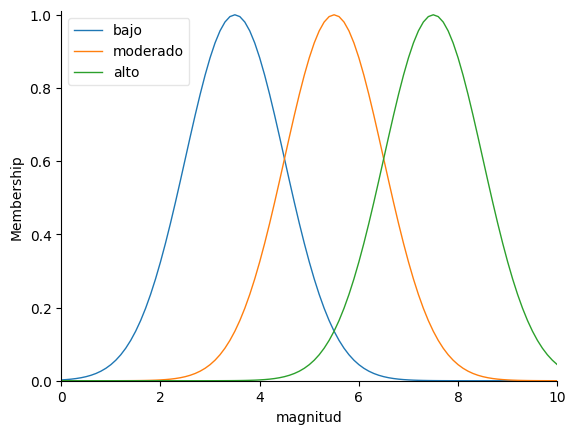

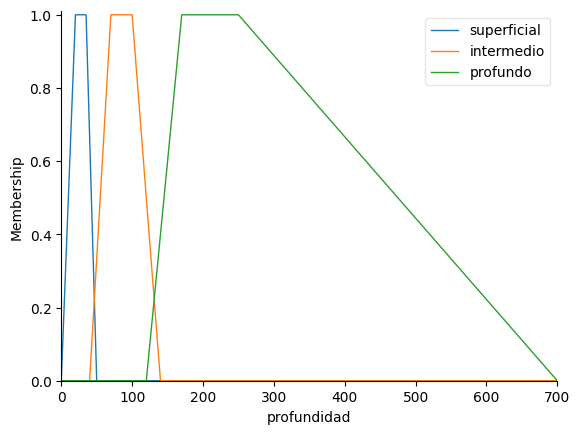

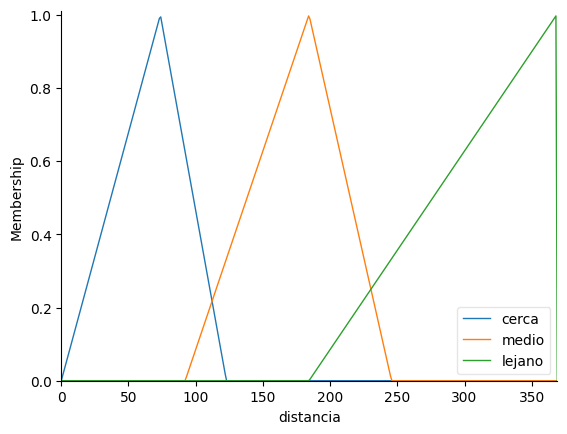

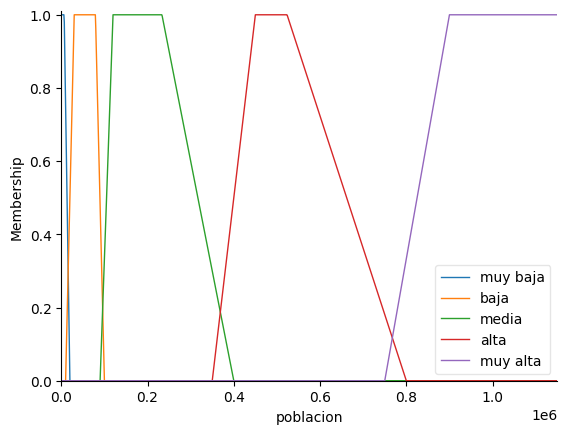

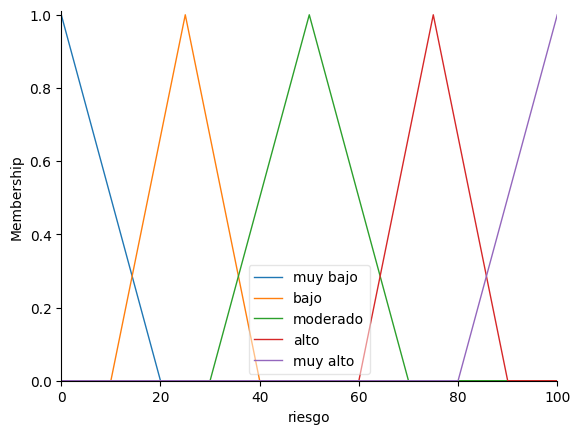

In [68]:
magnitud.view()
profundidad.view()
distancia.view()
poblacion.view()
riesgo.view()

In [69]:
# Reglas difusas
rules = [
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['cerca'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['cerca'] & poblacion['baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['cerca'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['cerca'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['cerca'] & poblacion['muy alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['medio'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['medio'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['medio'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['medio'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['medio'] & poblacion['muy alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['lejano'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['lejano'] & poblacion['baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['lejano'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['superficial'] & distancia['lejano'] & poblacion['muy alta'], riesgo['bajo']),
    
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['muy alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['medio'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['medio'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['medio'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['medio'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['medio'] & poblacion['muy alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['muy alta'], riesgo['bajo']),
    
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['cerca'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['cerca'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['cerca'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['cerca'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['cerca'] & poblacion['muy alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['medio'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['medio'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['medio'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['medio'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['medio'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['lejano'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['lejano'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['lejano'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['bajo'] & profundidad['profundo'] & distancia['lejano'] & poblacion['muy alta'], riesgo['moderado']),

    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['cerca'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['cerca'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['cerca'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['cerca'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['cerca'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['medio'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['medio'] & poblacion['baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['medio'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['medio'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['medio'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['lejano'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['lejano'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['lejano'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['superficial'] & distancia['lejano'] & poblacion['muy alta'], riesgo['moderado']),
    
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['medio'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['medio'] & poblacion['baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['medio'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['medio'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['medio'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['media'], riesgo['alto']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['muy alta'], riesgo['bajo']),
    
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['cerca'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['cerca'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['cerca'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['cerca'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['cerca'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['medio'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['medio'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['medio'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['medio'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['medio'] & poblacion['muy alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['lejano'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['lejano'] & poblacion['baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['lejano'] & poblacion['alta'], riesgo['bajo']),
    ctrl.Rule(magnitud['moderado'] & profundidad['profundo'] & distancia['lejano'] & poblacion['muy alta'], riesgo['moderado']),

    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['cerca'] & poblacion['muy baja'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['cerca'] & poblacion['baja'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['cerca'] & poblacion['media'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['cerca'] & poblacion['alta'], riesgo['muy alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['cerca'] & poblacion['muy alta'], riesgo['muy alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['medio'] & poblacion['muy baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['medio'] & poblacion['baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['medio'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['medio'] & poblacion['alta'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['medio'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['lejano'] & poblacion['muy baja'], riesgo['muy bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['lejano'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['lejano'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['superficial'] & distancia['lejano'] & poblacion['muy alta'], riesgo['moderado']),
    
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['muy baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['baja'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['media'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['alta'], riesgo['muy alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['cerca'] & poblacion['muy alta'], riesgo['muy alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['medio'] & poblacion['muy baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['medio'] & poblacion['baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['medio'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['medio'] & poblacion['alta'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['medio'] & poblacion['muy alta'], riesgo['muy alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['intermedio'] & distancia['lejano'] & poblacion['muy alta'], riesgo['moderado']),
    
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['cerca'] & poblacion['muy baja'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['cerca'] & poblacion['baja'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['cerca'] & poblacion['media'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['cerca'] & poblacion['alta'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['cerca'] & poblacion['muy alta'], riesgo['muy alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['medio'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['medio'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['medio'] & poblacion['media'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['medio'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['medio'] & poblacion['muy alta'], riesgo['alto']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['lejano'] & poblacion['muy baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['lejano'] & poblacion['baja'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['lejano'] & poblacion['media'], riesgo['bajo']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['lejano'] & poblacion['alta'], riesgo['moderado']),
    ctrl.Rule(magnitud['alto'] & profundidad['profundo'] & distancia['lejano'] & poblacion['muy alta'], riesgo['moderado'])
]

# Crear el sistema de control difuso con las reglas definidas
sistema_control = ctrl.ControlSystem(rules)
simulacion = ctrl.ControlSystemSimulation(sistema_control)

In [70]:
# # Prueba
# simulacion.input['magnitud'] = 9  # Magnitud moderada
# simulacion.input['profundidad'] = 100  # Profundidad intermedia
# simulacion.input['distancia'] = 50  # Distancia media
# simulacion.input['poblacion'] = 200000  # Población media

# # Computar el resultado
# simulacion.compute()

# # Obtener y mostrar la salida de riesgo
# riesgo_output = simulacion.output['riesgo']
# print(f"El nivel de riesgo calculado es: {riesgo_output}")

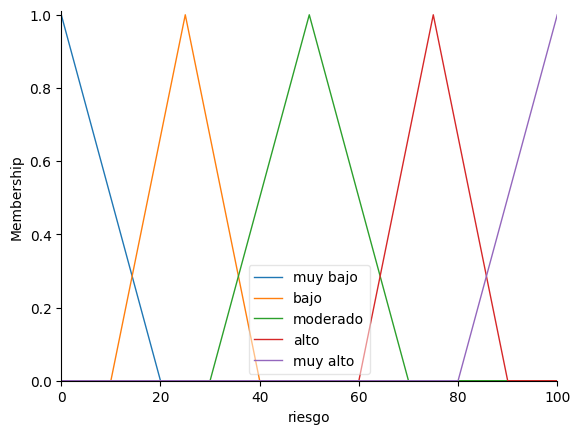

In [71]:
riesgo.view(simulacion=simulacion)

In [72]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import shape, Point
from geopy.distance import geodesic
import json

# Cargar el archivo CSV con los datos de población y geometría de los distritos
df = pd.read_csv('data/poblacion.csv', sep=';')

# Función para convertir cadenas GeoJSON a geometrías Shapely
def convert_geojson_to_geometry(geojson_string):
    geojson_dict = json.loads(geojson_string)  # Convertir la cadena JSON a un diccionario
    return shape(geojson_dict)

# Convertir las cadenas GeoJSON a geometrías y crear un GeoDataFrame
df['geometry'] = df['Geo Shape'].apply(convert_geojson_to_geometry)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Definir el epicentro del sismo con coordenadas de ejemplo
epicentro_lat = -16.15
epicentro_lon = -73.40
epicentro = Point(epicentro_lon, epicentro_lat)

# Crear un buffer alrededor del epicentro usando la conversión adecuada de km a grados (aproximación para latitud)
buffer_radius = R_km / 110.574  # Conversión de kilómetros a grados
area_de_efecto = epicentro.buffer(buffer_radius)

# Intersectar el área de efecto con los distritos en el GeoDataFrame
distritos_en_area_efecto = gdf[gdf.intersects(area_de_efecto)]

# Función para calcular la distancia geodésica desde el epicentro a cada distrito afectado
def calcular_distancia(geometry, epicentro):
    centroide_distrito = geometry.centroid
    distancia = geodesic((epicentro.y, epicentro.x), (centroide_distrito.y, centroide_distrito.x)).kilometers
    return distancia

# Calcular la distancia desde el epicentro para cada distrito afectado y añadirla al GeoDataFrame
distritos_en_area_efecto['DISTANCIA'] = distritos_en_area_efecto.geometry.apply(lambda geom: calcular_distancia(geom, epicentro))


/home/leon/Documentos/UNSA/IA/articulo-ia/venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


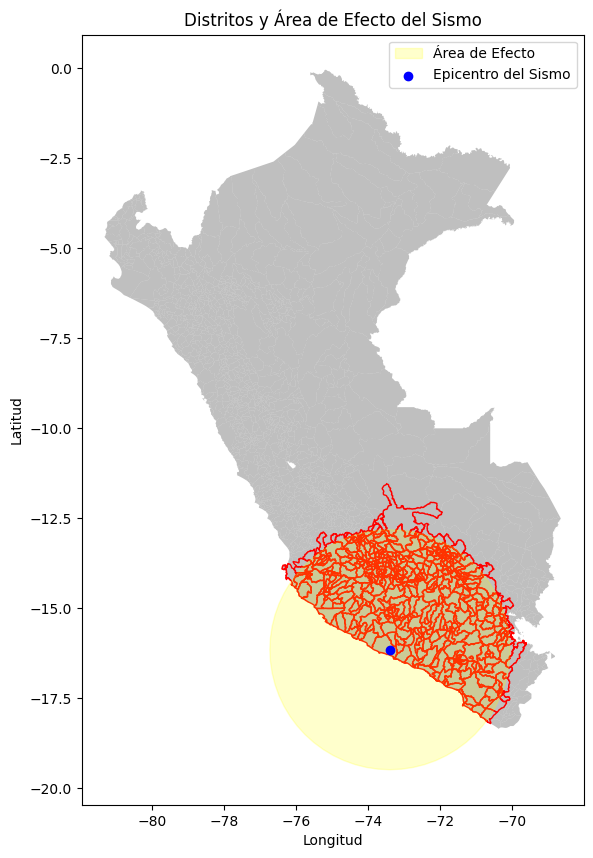

      NOMBDIST    NOMBPROV   NOMBDEP   DISTANCIA  POBLACION
14  YANAQUIHUA  CONDESUYOS  AREQUIPA   63.522779     4415.0
15   MACHAGUAY    CASTILLA  AREQUIPA  116.499519      564.0
16   ORCOPAMPA    CASTILLA  AREQUIPA  168.326593     8906.0
17  PAMPACOLCA    CASTILLA  AREQUIPA   99.021225     2269.0
18       URACA    CASTILLA  AREQUIPA   94.309271     7199.0


In [73]:
import matplotlib.pyplot as plt

def visualizar_resultados(gdf, distritos_en_area_efecto, area_de_efecto, epicentro):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotear todos los distritos en transparencia para el fondo
    gdf.plot(ax=ax, color='grey', alpha=0.5)

    # Plotear los distritos que intersectan con el área de efecto
    distritos_en_area_efecto.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1)

    # Plotear el área de efecto del sismo
    x, y = area_de_efecto.exterior.xy
    ax.fill(x, y, alpha=0.2, color='yellow', label='Área de Efecto')

    # Plotear el epicentro del sismo
    ax.scatter(epicentro.x, epicentro.y, color='blue', label='Epicentro del Sismo', zorder=5)

    # Configuración adicional del gráfico
    ax.set_title('Distritos y Área de Efecto del Sismo')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()

    # Guardar la figura como archivo PNG
    plt.savefig('distritos_area_efecto_sismo.png', dpi=300)

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso de la función visualizar_resultados
visualizar_resultados(gdf, distritos_en_area_efecto, area_de_efecto, epicentro)

# Mostrar las primeras filas para verificar
print(distritos_en_area_efecto[['NOMBDIST', 'NOMBPROV', 'NOMBDEP', 'DISTANCIA', 'POBLACION']].head())


In [74]:
distritos_en_area_efecto.columns

Index(['Geo Point', 'Geo Shape', 'CCDD', 'NOMBDEP', 'CCPP', 'NOMBPROV', 'CCDI',
       'NOMBDIST', 'CAPITAL', 'UBIGEO', 'IDPROV', 'CODIGO', 'CNT_CCPP',
       'DESCRIPCIO', 'POBLACION', 'FECHA', 'DAT_POB', 'geometry', 'DISTANCIA'],
      dtype='object')

In [75]:
distritos_en_area_efecto.head(1)

,Geo Point,Geo Shape,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,POBLACION,FECHA,DAT_POB,geometry,DISTANCIA
14,"-15.701962903, -73.0291096848","{""coordinates"": [[[-73.20532648323058, -15.510...",4,AREQUIPA,6,CONDESUYOS,8,YANAQUIHUA,YANAQUIHUA,40608,406,40608,53,YANAQUIHUA,4415.0,2020.0,INEI,"POLYGON ((-73.20533 -15.51063, -73.20513 -15.5...",63.522779


In [76]:
# Añadir una nueva columna 'riesgo' al DataFrame para almacenar los resultados de la simulación
distritos_en_area_efecto['riesgo'] = 0

# Recorrer cada fila del DataFrame para realizar la simulación de riesgo
for index, row in distritos_en_area_efecto.iterrows():
    # Asignar valores de entrada para la simulación basados en las columnas del DataFrame
    simulacion.input['magnitud'] = magnitud_momento  # Magnitud del sismo
    simulacion.input['profundidad'] = profundidad_sismo  # Profundidad del epicentro (ajustar según sea necesario)
    simulacion.input['distancia'] = row['DISTANCIA']  # Distancia del distrito al epicentro
    simulacion.input['poblacion'] = row['POBLACION']  # Población del distrito
    
    try:
        # Computar el resultado de la simulación
        simulacion.compute()
        
        # Obtener la salida de riesgo y añadirla al DataFrame en la columna 'riesgo'
        distritos_en_area_efecto.at[index, 'riesgo'] = simulacion.output['riesgo']
    except ValueError:
        # Si no se puede calcular el riesgo, asignar un valor por defecto (NaN) y manejar el error
        distritos_en_area_efecto.at[index, 'riesgo'] = np.nan
        print(f"No se pudo calcular el riesgo para el distrito en el índice {index} debido a valores de entrada no cubiertos por las reglas.")

# Mostrar las primeras filas del DataFrame para verificar los resultados
print(distritos_en_area_efecto[['NOMBDIST', 'NOMBPROV', 'NOMBDEP', 'DISTANCIA', 'POBLACION', 'riesgo']].head())


/home/leon/Documentos/UNSA/IA/articulo-ia/venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_49334/2096229910.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.23223958420137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  distritos_en_area_efecto.at[index, 'riesgo'] = simulacion.output['riesgo']


No se pudo calcular el riesgo para el distrito en el índice 320 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 322 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 325 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 345 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 355 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 365 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 522 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo para el distrito en el índice 699 debido a valores de entrada no cubiertos por las reglas.
No se pudo calcular el riesgo pa

In [80]:
distritos_csv = distritos_en_area_efecto[['NOMBDIST' , 'NOMBPROV' , 'NOMBDEP', 'POBLACION' , 'DISTANCIA' ,'riesgo']]
distritos_csv.to_csv('data/riesgo.csv')

/home/leon/Documentos/UNSA/IA/articulo-ia/venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


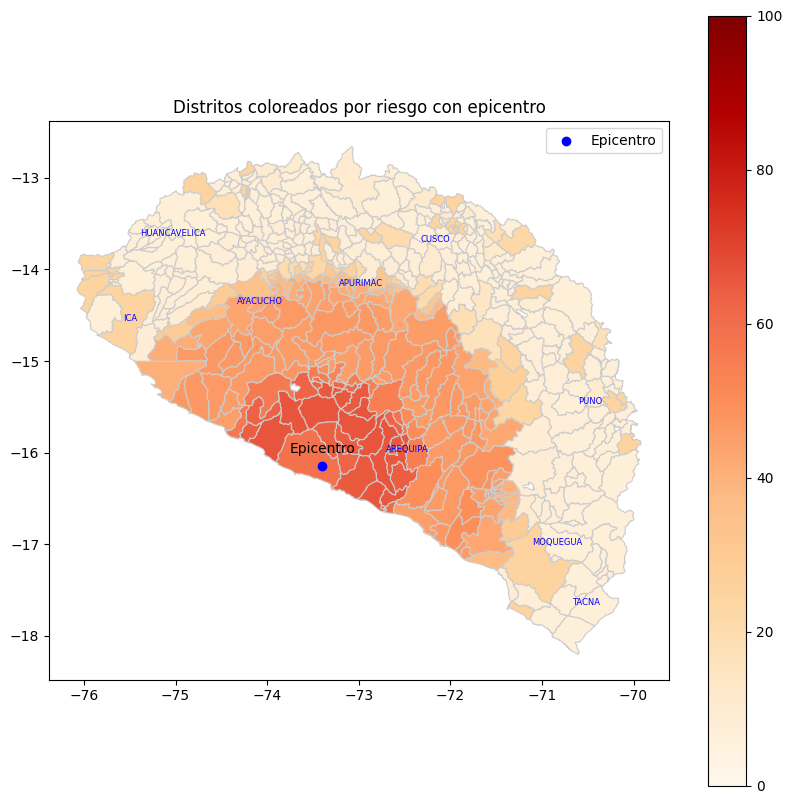

In [78]:
import geopandas as gpd
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

# Convertir GeoJSON a geometría y añadirla al DataFrame
distritos_en_area_efecto['geometry'] = distritos_en_area_efecto['Geo Shape'].apply(convert_geojson_to_geometry)

# Crear un GeoDataFrame con la geometría actualizada
gdf = gpd.GeoDataFrame(distritos_en_area_efecto, geometry='geometry')

# Configurar la escala de color para el gráfico, límite máximo de 100
norm = Normalize(vmin=0, vmax=100)

# Graficar los distritos coloreados según el riesgo
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='riesgo', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)

# Graficar el epicentro
ax.scatter(epicentro_lon, epicentro_lat, color='blue', label='Epicentro', zorder=5)
ax.annotate('Epicentro', (epicentro_lon, epicentro_lat), textcoords="offset points", xytext=(0,10), ha='center')

# Agrupar por departamento y etiquetar una vez por grupo
departamentos = distritos_en_area_efecto.dissolve(by='NOMBDEP')
for idx, row in departamentos.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(idx, xy=(centroid.x, centroid.y), textcoords='offset points', xytext=(0,-10), ha='center', fontsize=6, color='blue')

# Configuración del título y leyenda del gráfico
plt.title('Distritos coloreados por riesgo con epicentro')
plt.legend()
plt.show()
